<a href="https://colab.research.google.com/github/Vaibhav-chauhan11/Mathematics_for_Machine_Learning/blob/main/Ridge%26Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.05801798961692717

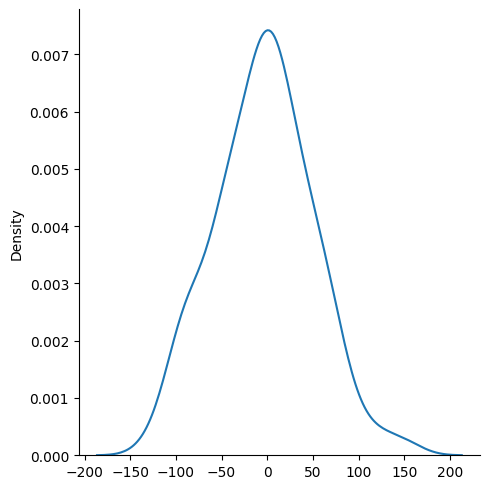

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=load_diabetes()
dataset=pd.DataFrame(df.data)
x=dataset
y=df.target
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
## staandardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score
regression= LinearRegression()
regression.fit(X_train,y_train)
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)
## prediction
reg_pred = regression.predict(X_test)
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score


Ridge Regression used to solve overfitting


In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [5]:
ridge_regressor = Ridge()
ridge_regressor


Ridge()

In [6]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,]}
ridgecv= GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [8]:
print(ridgecv.best_params_)

{'alpha': 1}


In [10]:
print(ridgecv.best_score_)

-3165.461652918006


In [13]:
ridge_pred = ridgecv.predict(X_test)

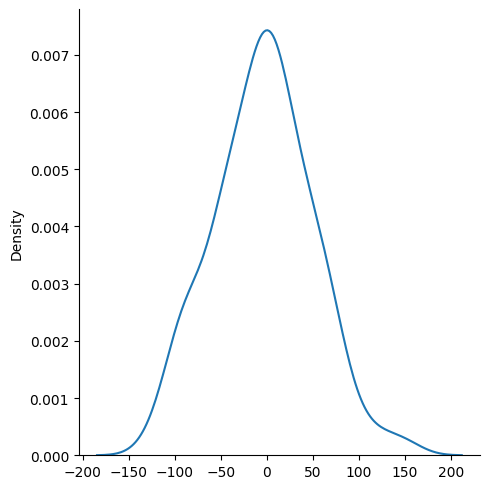

In [14]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [16]:
score=r2_score(ridge_pred,y_test)
score

0.04315711129292432

Lasso Regression

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [19]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90,]}
lassocv= GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [20]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-3190.865569339867


In [21]:
lasso_pred = lassocv.predict(X_test)


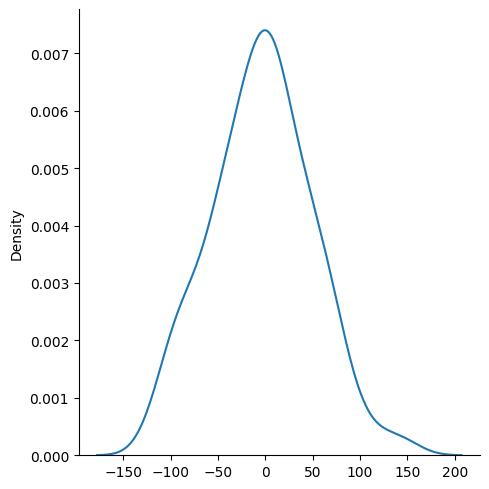

In [22]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind="kde")